In [1]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style='white')

In [2]:
data = pd.read_excel('data/BakeryData_Vilnius.xlsx')
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data

,date,weekday,main street A,main street B,station A,station B
0,2016-05-11,3,2.23,NaN,NaN,NaN
1,2016-05-12,4,18.10,NaN,NaN,NaN
2,2016-05-13,5,15.85,NaN,NaN,NaN
3,2016-05-14,6,14.22,NaN,NaN,NaN
4,2016-05-15,7,2.58,NaN,NaN,NaN
...,...,...,...,...,...,...
2572,2023-05-27,6,168.05,32.34,76.97,114.30
2573,2023-05-28,7,44.62,32.85,80.21,91.25
2574,2023-05-29,1,64.11,116.84,149.75,92.56
2575,2023-05-30,2,103.63,134.48,194.03,75.63


In [107]:
# filter out corona data and data before 2017
def filter_out_data(data):
    start_corona_remove = pd.to_datetime('2020-10-01')
    end_corona_remove = pd.to_datetime('2022-10-01')
    start_remove = pd.to_datetime('2017-01-01')
    filtered_data = data.loc[(data.date < start_corona_remove) | (data.date > end_corona_remove)]
    filtered_data = filtered_data.loc[(filtered_data.date > start_remove)]
    return filtered_data

kwargs = dict(alpha=0.5, bins=100)

def show_hist(data, title):
    data.hist('values', **kwargs, color='r')
    plt.title(title)
    plt.show()

In [108]:
streetAData = data[['date', 'weekday', 'main street A']].rename(columns={'main street A': 'values'}).dropna()
stationAData = data[['date', 'weekday', 'station A']].rename(columns={'station A': 'values'}).dropna()

filtered_data_streeta = filter_out_data(streetAData)
filtered_data_stationa = filter_out_data(stationAData)

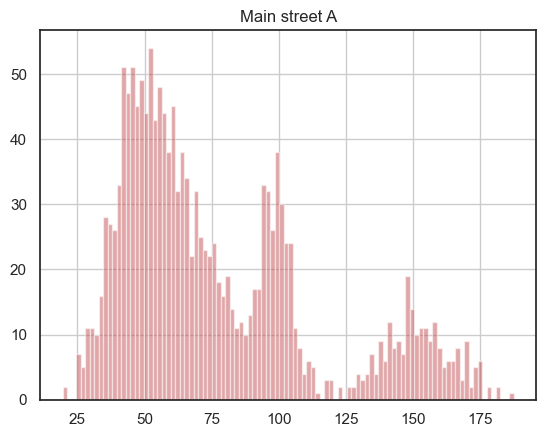

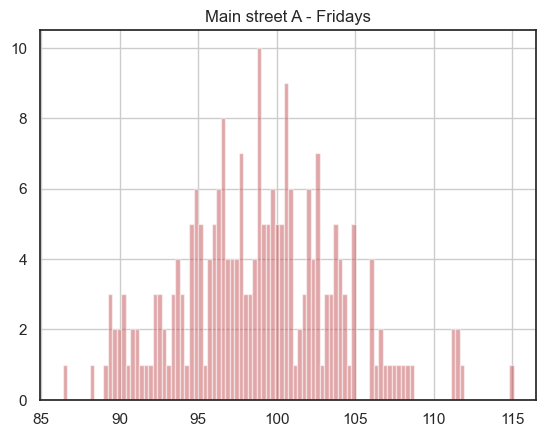

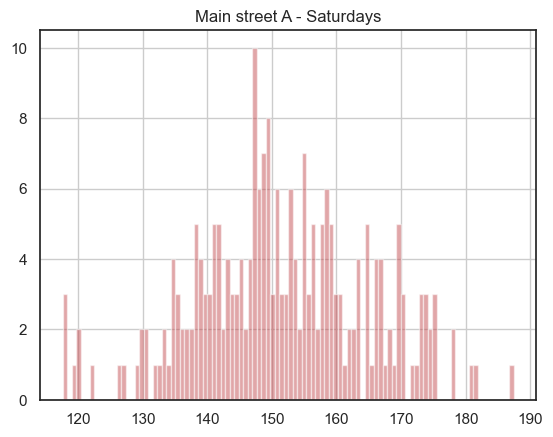

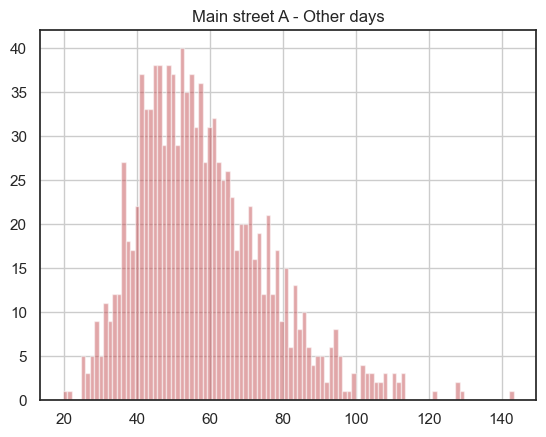

In [109]:
# Main street A - distribution analysis
other_days, saturdays = [x for _, x in filtered_data_streeta.groupby(filtered_data_streeta['weekday'] == 6)]
other_days, fridays =  [x for _, x in other_days.groupby(filtered_data_streeta['weekday'] == 5)]

show_hist(filtered_data_streeta, "Main street A")
show_hist(fridays, "Main street A - Fridays")
show_hist(saturdays, "Main street A - Saturdays")
show_hist(other_days, "Main street A - Other days")

In [110]:
# Jarque-Bera normality test
fridays_test_pvalue = scipy.stats.jarque_bera(fridays['values']).pvalue
saturdays_test_pvalue = scipy.stats.jarque_bera(saturdays['values']).pvalue
other_days_test_pvalue = scipy.stats.jarque_bera(other_days['values']).pvalue

print("Fridays normality test p-value", fridays_test_pvalue)
print("Saturdays normality test p-value", saturdays_test_pvalue)
print("Other days normality test p-value", other_days_test_pvalue)

Fridays normality test p-value 0.29748948080218435
Saturdays normality test p-value 0.8889855452044239
Other days normality test p-value 2.4128625731711325e-44


In [111]:
# Testing data of other days (except Fridays and Saturdays) for log normality

# Kolmogorov-Smirnov test
kstest_pvalue = scipy.stats.kstest(other_days['values'], "lognorm", scipy.stats.lognorm.fit(other_days['values'])).pvalue

# Jarque-Bera test
logdata = np.log(other_days['values'])
jb_pvalue = scipy.stats.jarque_bera(logdata).pvalue

print("Ks test p-value", kstest_pvalue)
print("Jb test p-value", jb_pvalue)

Ks test p-value 0.9910806010921955
Jb test p-value 0.9353182401172891


In [112]:
# Station A - distribution analysis
weekend, weekdays = [x for _, x in filtered_data_stationa.groupby(filtered_data_streeta['weekday'] <= 5)]

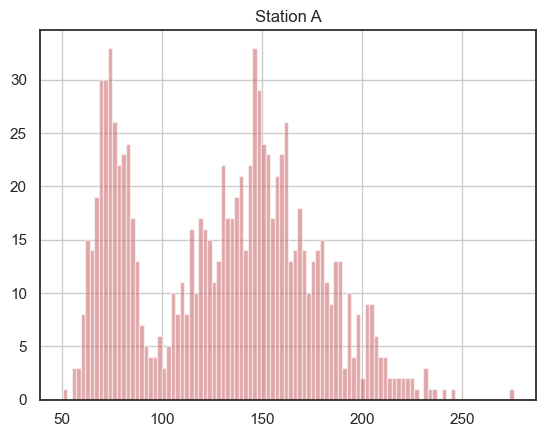

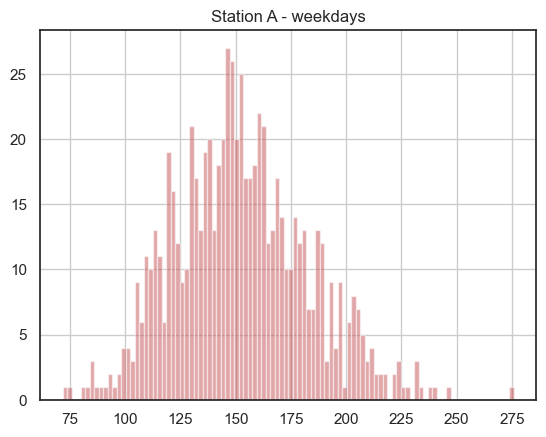

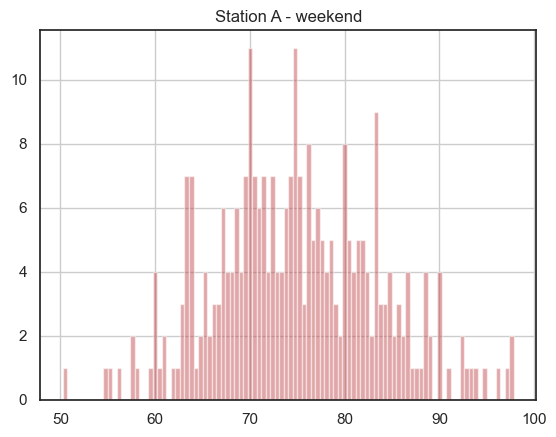

In [113]:
show_hist(filtered_data_stationa, "Station A")
show_hist(weekdays, "Station A - weekdays")
show_hist(weekend, "Station A - weekend")

In [114]:
# Jarque-Bera normality test
weekdays_test_pvalue = scipy.stats.jarque_bera(weekdays['values']).pvalue
weekend_test_pvalue = scipy.stats.jarque_bera(weekend['values']).pvalue

print("Weekdays normality test p-value", weekdays_test_pvalue)
print("Weekend normality test p-value", weekend_test_pvalue)

Weekdays normality test p-value 0.00047396489752660805
Weekend normality test p-value 0.4734952284874244


In [115]:
# Testing data of weekdays for log normality

# Kolmogorov-Smirnov test
kstest_pvalue = scipy.stats.kstest(weekdays['values'], "lognorm", scipy.stats.lognorm.fit(weekdays['values'])).pvalue

# Jarque-Bera test
logdata = np.log(weekdays['values'])
jb_pvalue = scipy.stats.jarque_bera(logdata).pvalue

print("Ks test p-value", kstest_pvalue)
print("Jb test p-value", jb_pvalue)

Ks test p-value 0.0
Jb test p-value 0.010624123573096075
